# Análises espaciais e Plotagens com GeoPandas

Alguns arquivos espaciais: http://forest-gis.com/2009/04/base-de-dados-shapefile-do-brasil-todo.html/

In [1]:
# !pip install geopandas

In [87]:
import geopandas as gpd
import fiona
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt

fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support 
fiona.drvsupport.supported_drivers['KML'] = 'rw'
%config InlineBackend.figure_format = 'retina' # pode deixar o notebook pesado ...

%matplotlib inline

In [47]:
df = pd.read_csv('data/example100k.zip')

del df['Unnamed: 0']

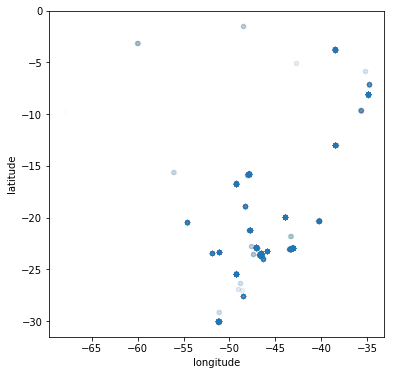

In [59]:
df.sample(10000, random_state=42).plot.scatter(x='longitude', y='latitude', figsize=(6,6), alpha=.01)

In [51]:
masksp = (df.longitude>-47)&(df.longitude<-46.4)&(df.latitude>-25)&(df.latitude<-23.3)
df[masksp].shape

(34121, 3)

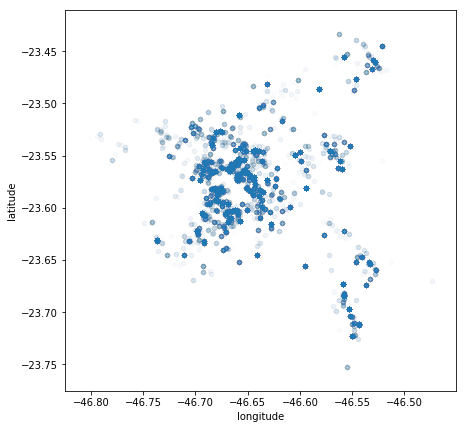

In [60]:
df[masksp].plot.scatter(x='longitude', y='latitude', figsize=(7, 7), alpha=.01)

In [61]:
bairros = gpd.read_file('./data/DistritosAdministrativos.kml')
bairros.head()

,Name,Description,geometry
0,MANDAQUI,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(POLYGON Z ((-46.65471793567885 -23.4306520687...
1,MARSILAC,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(POLYGON Z ((-46.60986701122582 -23.9055068089...
2,MOEMA,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(POLYGON Z ((-46.65360343174466 -23.5721951854...
3,MOOCA,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(POLYGON Z ((-46.60392674937301 -23.5672049525...
4,MORUMBI,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(POLYGON Z ((-46.72808690539272 -23.6115466186...


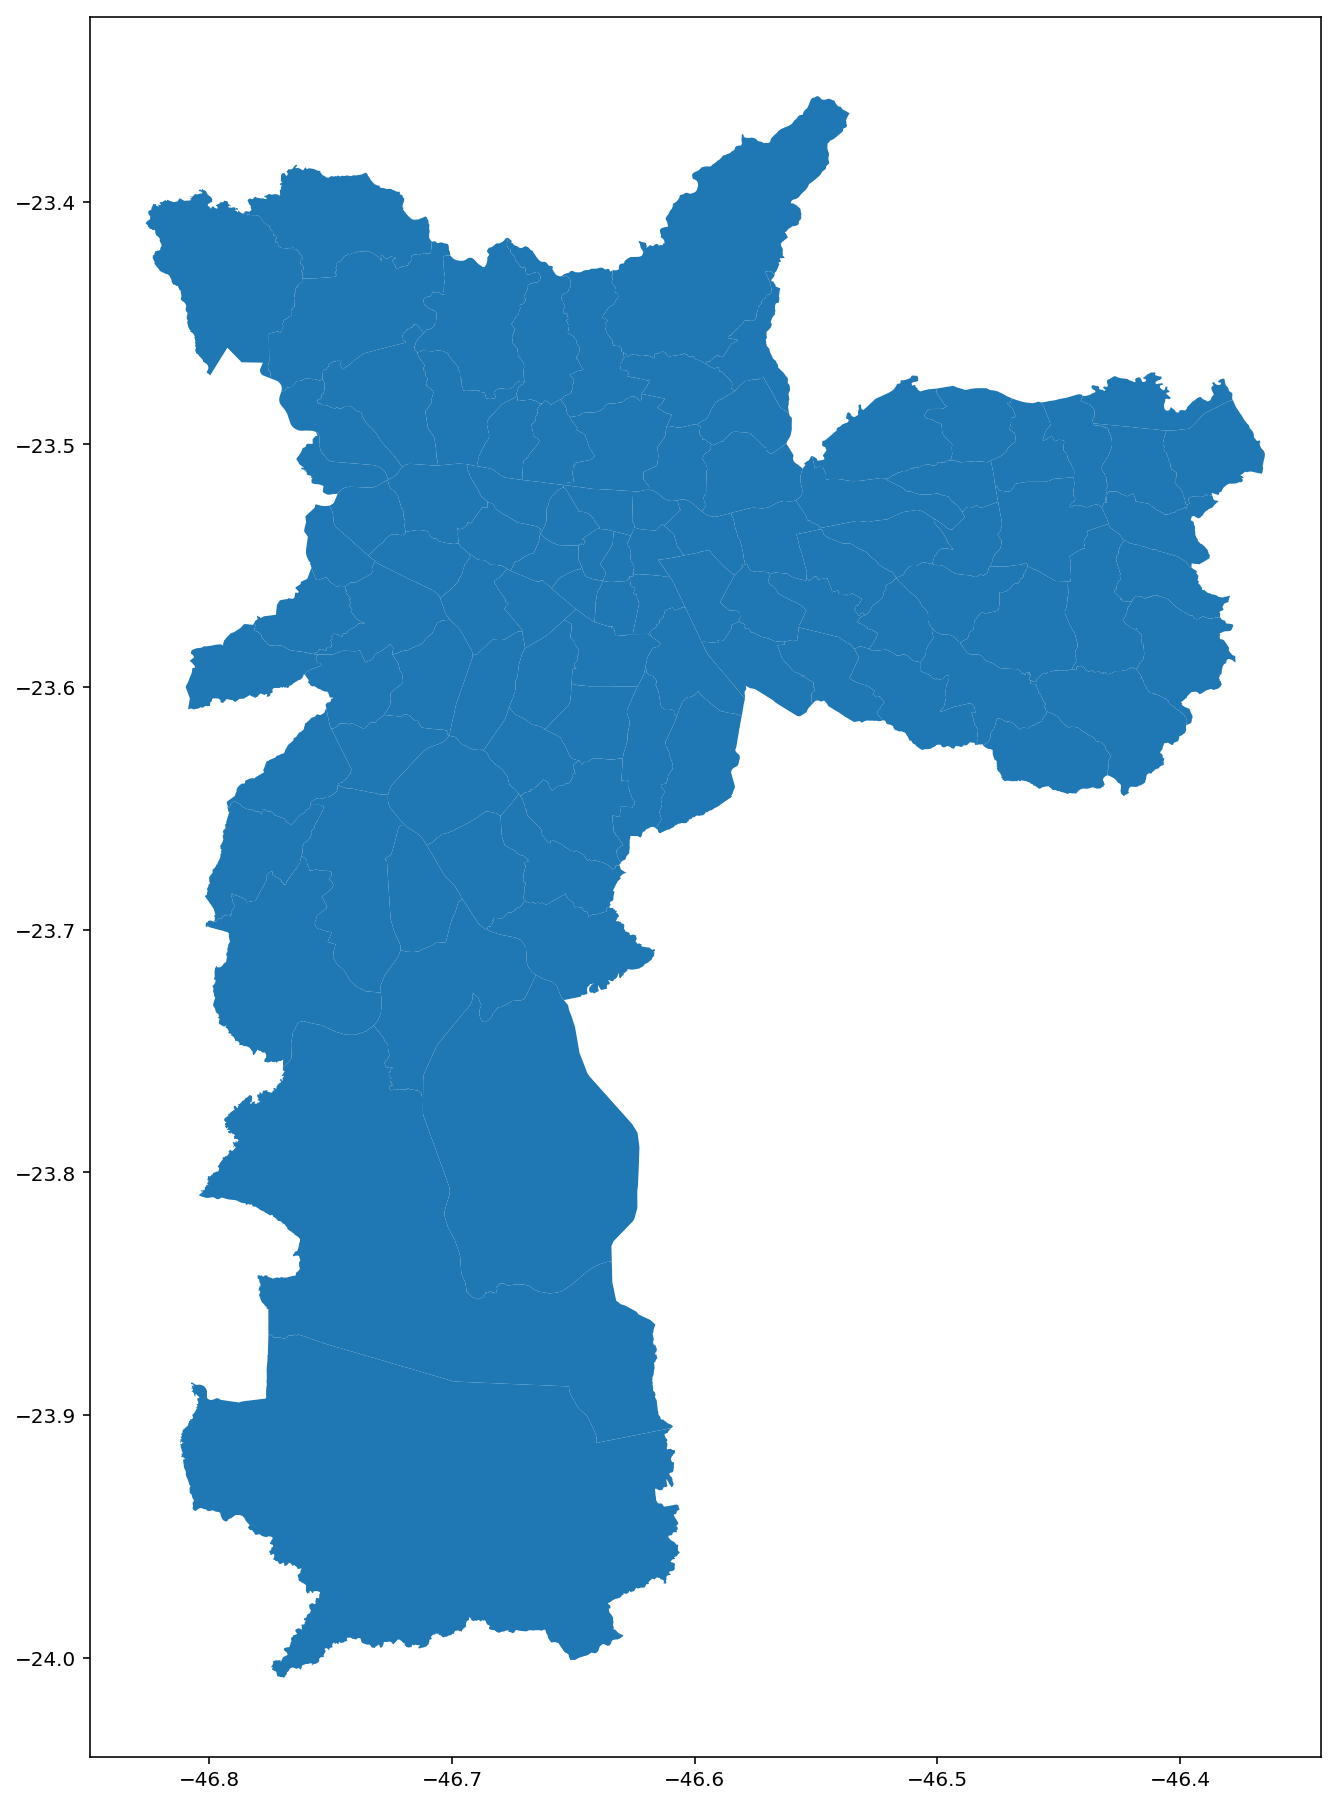

In [76]:
bairros.plot(figsize=(20,16))

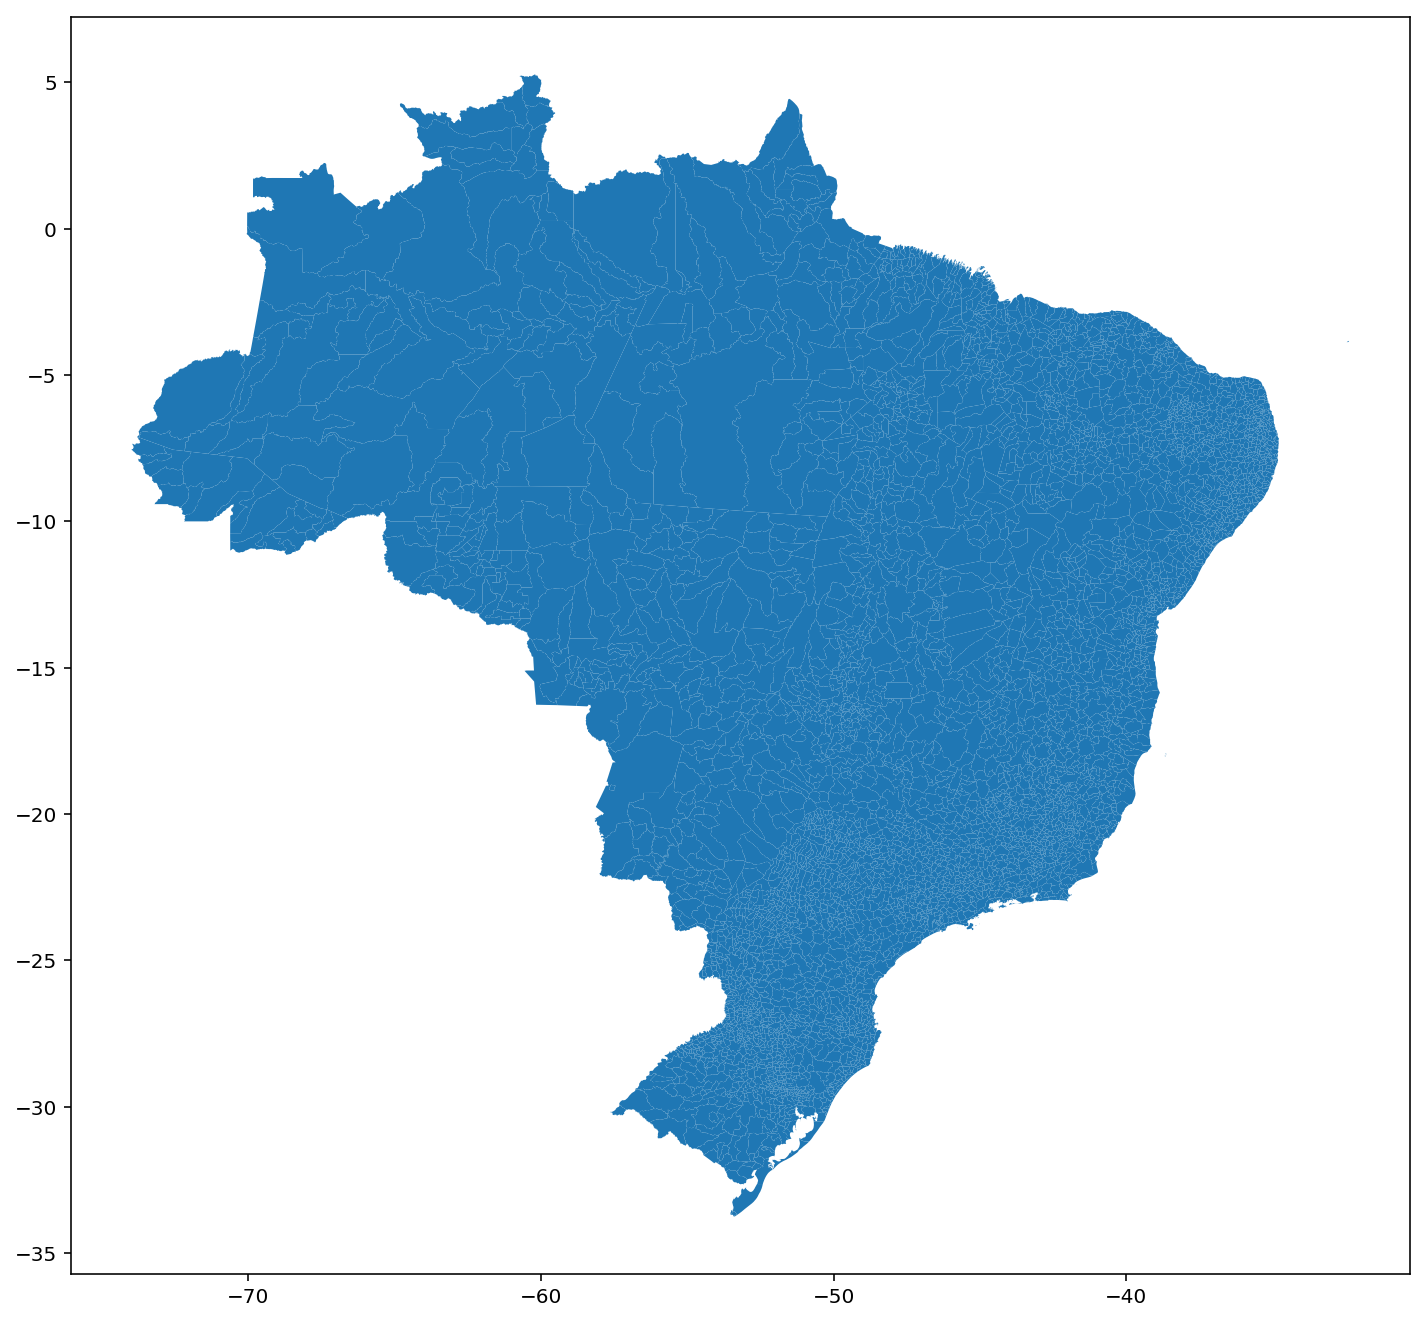

In [75]:
exemplo = gpd.read_file('data/municipios_2010.shp')
exemplo.plot(figsize=(12,12))

C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


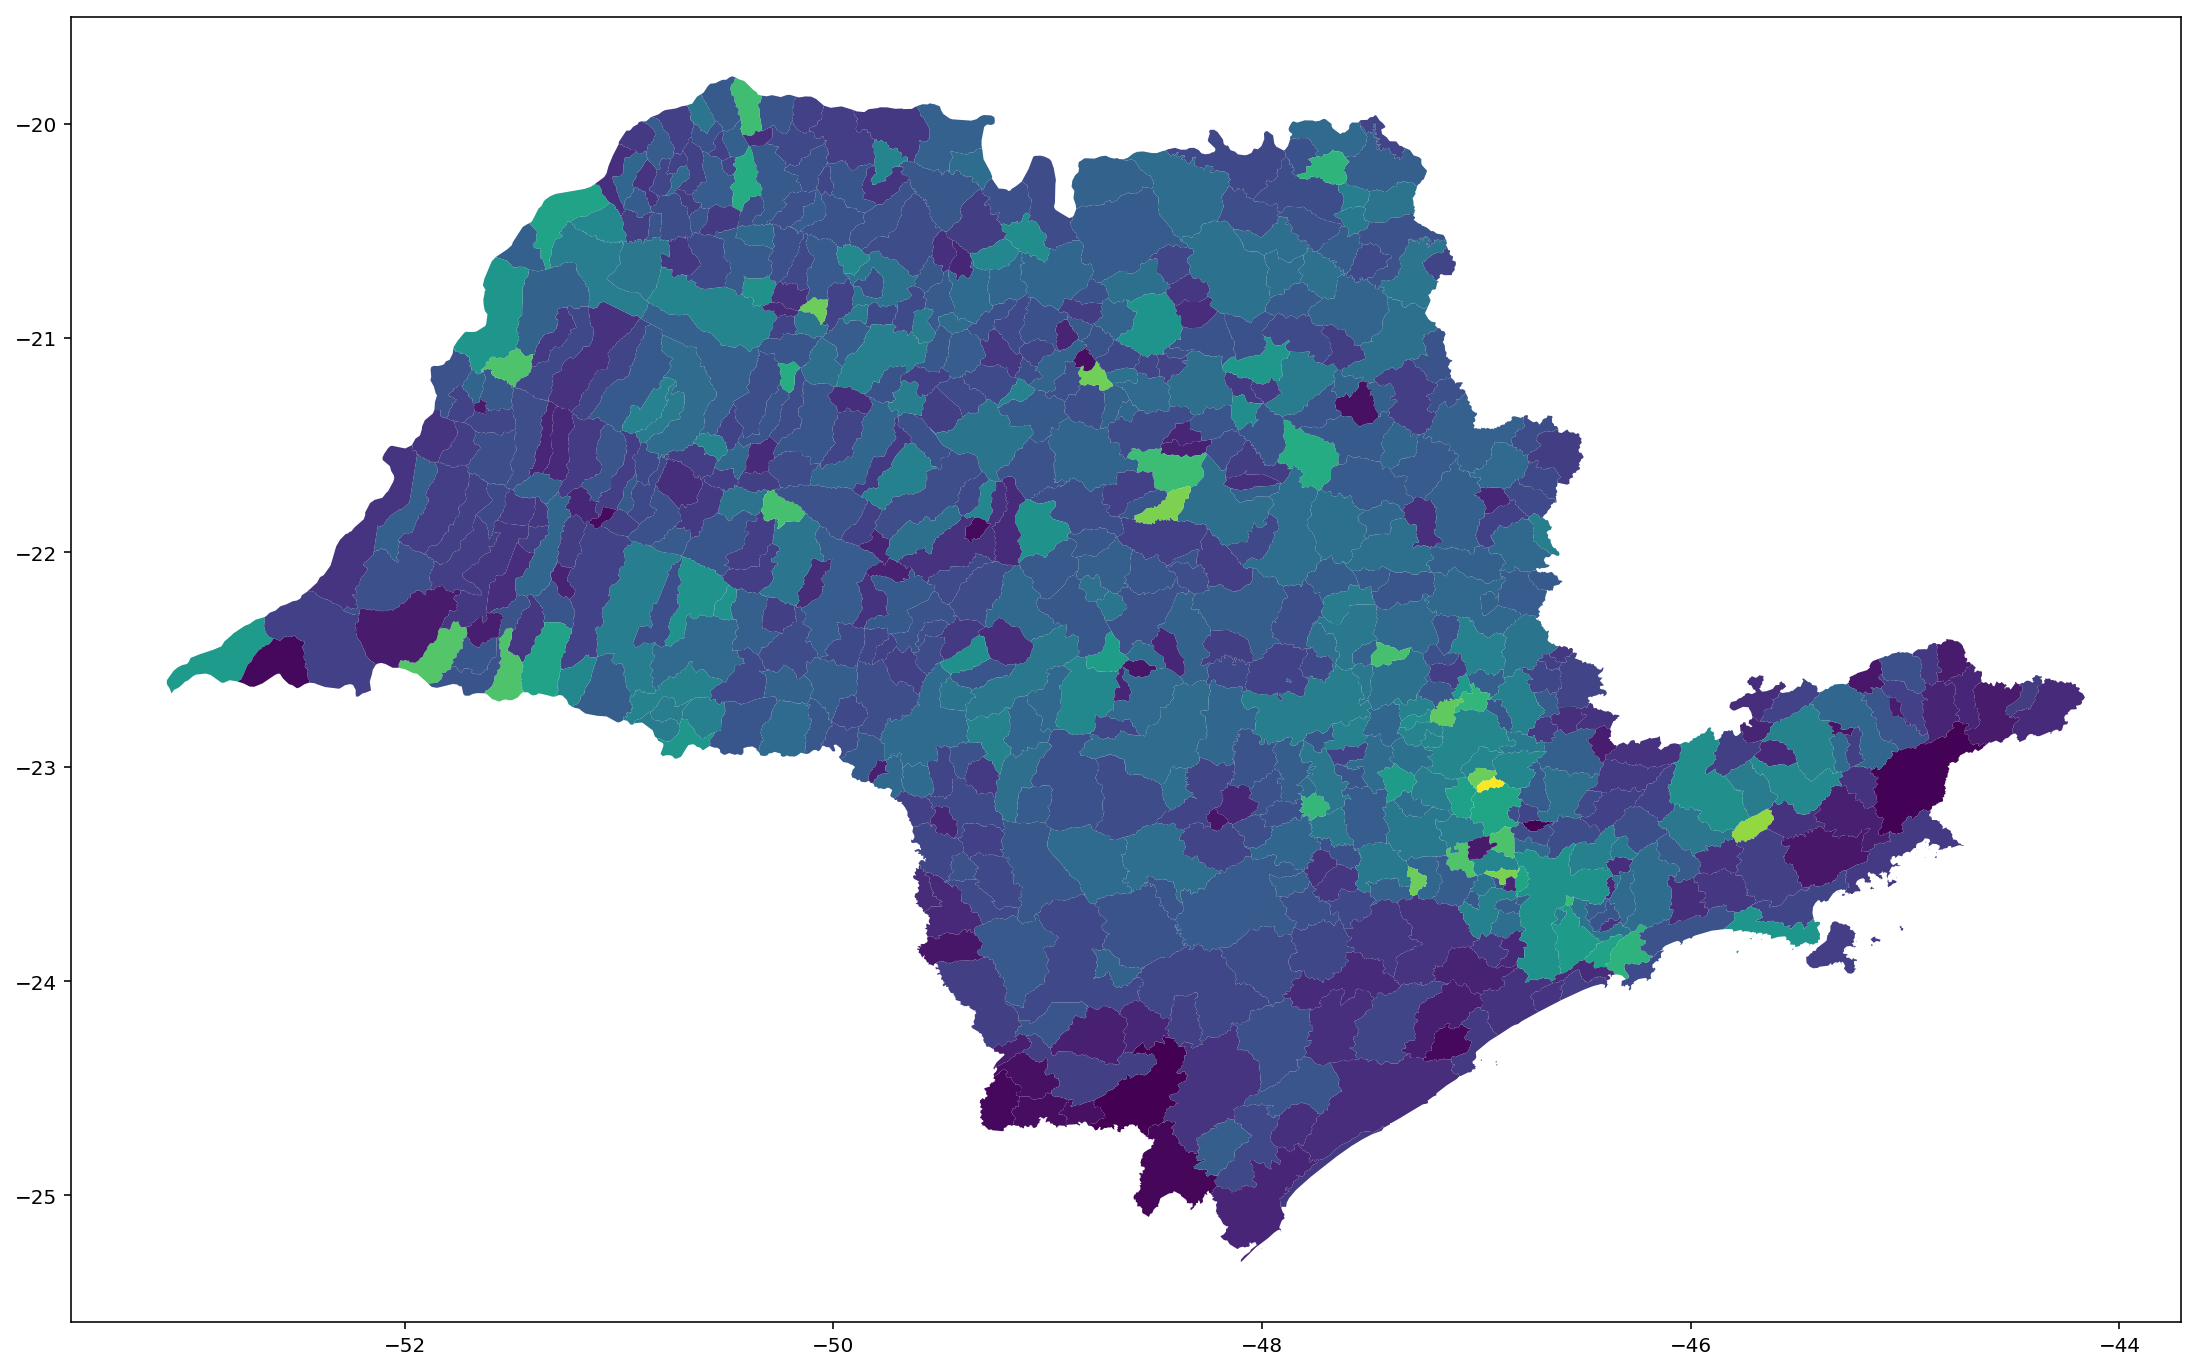

In [79]:
exemplo['populacao'] = exemplo['populacao'].astype(int)
exemplo['pib'] = exemplo['pib'].astype(int)
exemplo['pib_percapita'] = exemplo['pib']/exemplo['populacao']
exemplo['log_pib_percapita'] = np.log(exemplo['pib_percapita'])
# exemplo.sort_values(by=['pib_percapita'],ascending=False).head(10)
temp4sp=exemplo[(exemplo['uf']=='SP')]
temp4sp['log_pib_percapita'] = np.log(temp4sp['pib_percapita'])
temp4sp.plot(column='log_pib_percapita',figsize=(30,12))

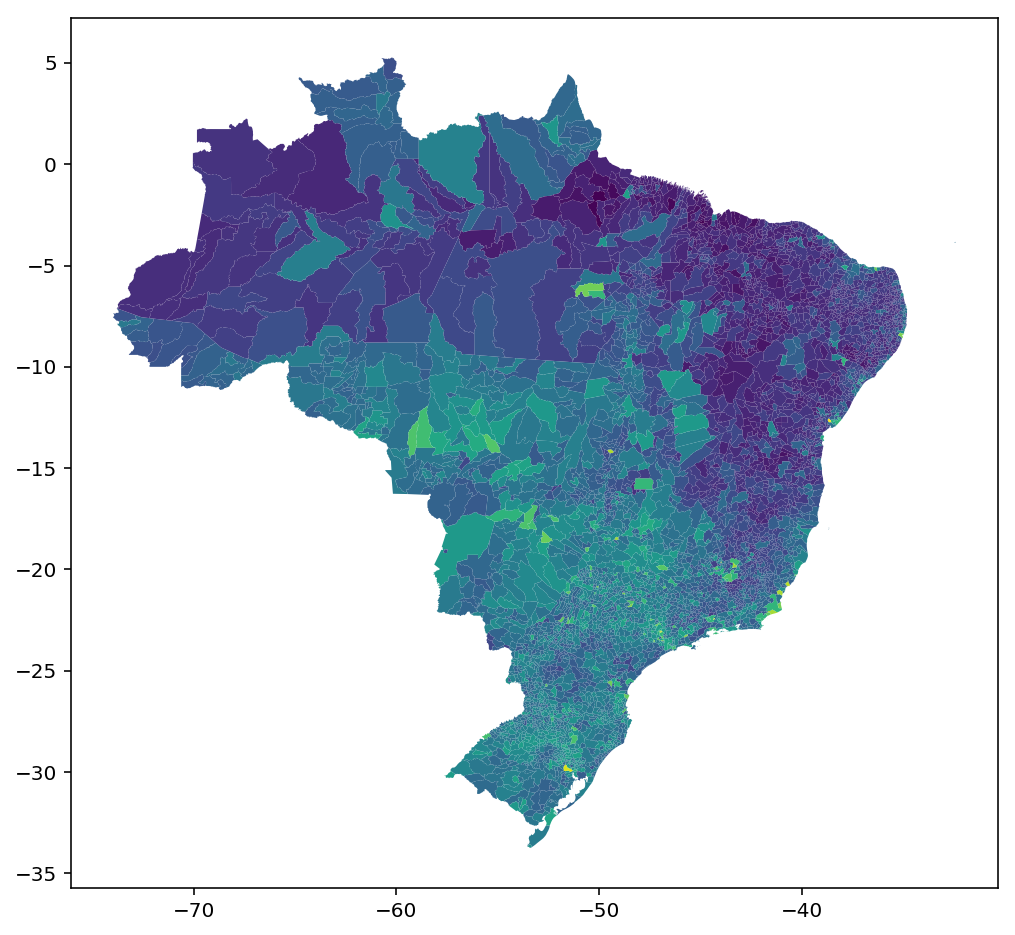

In [81]:
exemplo.plot(column='log_pib_percapita',figsize=(16,8))

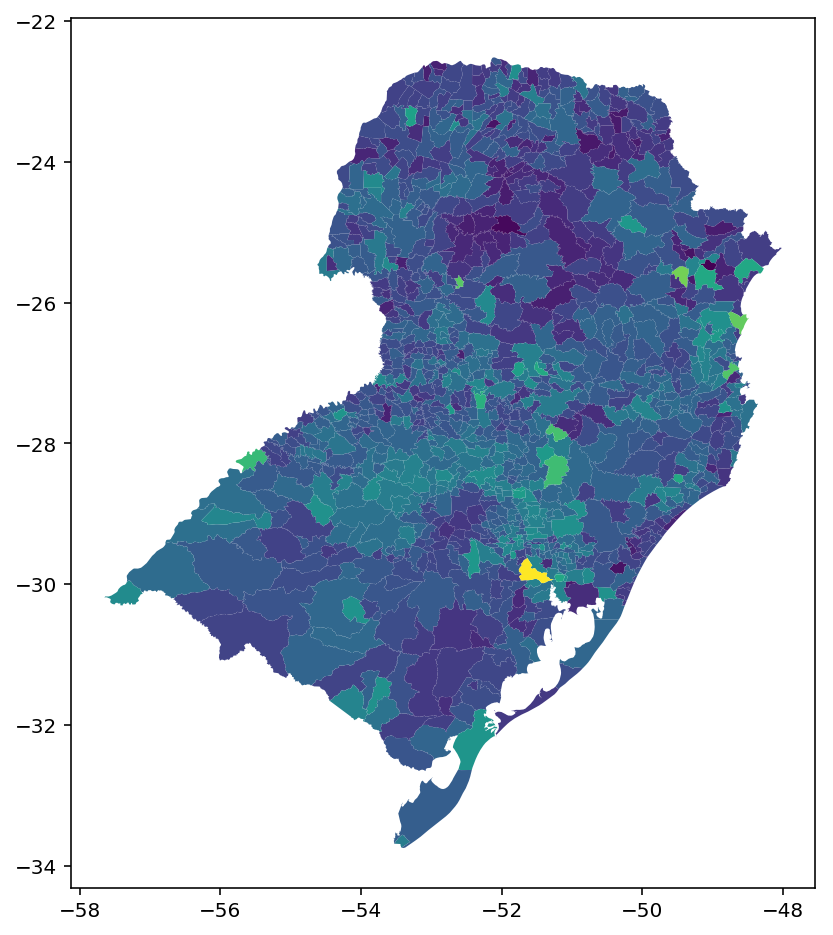

In [84]:
sul = ['SC','PR','RS']
temp4sul = exemplo[(exemplo['uf'].isin(sul))]
temp4sul.plot(column='log_pib_percapita',figsize=(18,8))

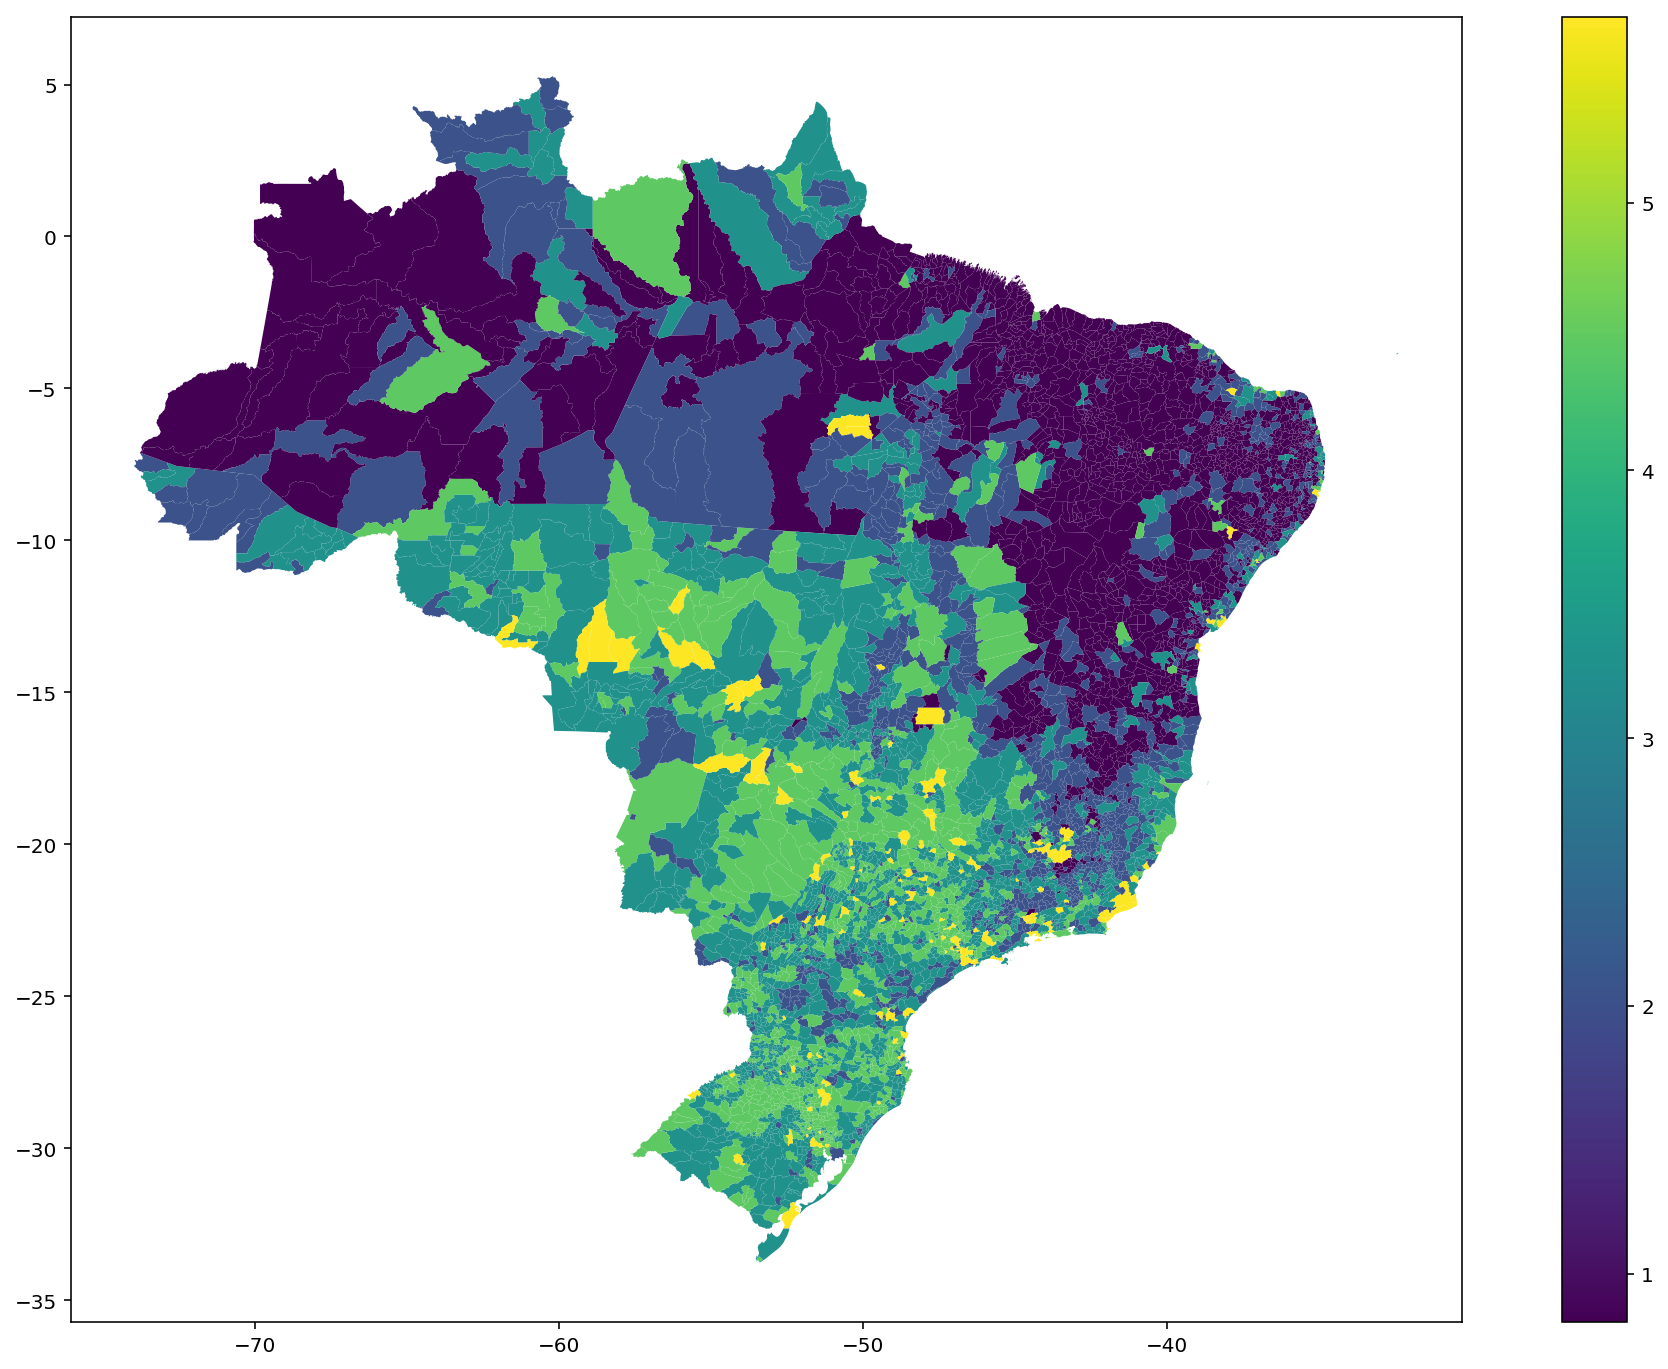

In [88]:
fig, ax = plt.subplots(1, figsize=(18, 12))
exemplo.plot(column='log_pib_percapita', ax=ax, scheme='fisher_jenks')
vmin, vmax = exemplo['log_pib_percapita'].min(), exemplo['log_pib_percapita'].max()
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.show()

# Join espacial ponto -> poligono

In [89]:
from shapely.geometry import Point
from geopandas.tools import sjoin

In [91]:
points = df[['latitude','longitude']]
gpoints = gpd.GeoDataFrame(points)
gpoints['Coordinates'] = list(zip(gpoints.longitude, gpoints.latitude))
gpoints['Coordinates'] = gpoints['Coordinates'].apply(Point)
gpoints = gpd.GeoDataFrame(gpoints, geometry='Coordinates')

In [93]:
gpoints.head()

,latitude,longitude,Coordinates
0,-23.000790,-43.384157,POINT (-43.384157 -23.00079)
1,-22.906963,-43.110082,POINT (-43.110082 -22.906963)
2,-9.652079,-35.714761,POINT (-35.714761 -9.652078999999999)
3,-3.741768,-38.471682,POINT (-38.471682 -3.741768)
4,-23.585107,-46.676430,POINT (-46.67643 -23.585107)


In [100]:
bairros = gpd.GeoDataFrame(bairros, geometry='geometry')
pointInPolys = sjoin(gpoints, bairros, how='left')

In [101]:
pointInPolys.head(10)

,latitude,longitude,Coordinates,index_right,Name,Description
0,-23.000790,-43.384157,POINT (-43.384157 -23.00079),NaN,NaN,NaN
1,-22.906963,-43.110082,POINT (-43.110082 -22.906963),NaN,NaN,NaN
2,-9.652079,-35.714761,POINT (-35.714761 -9.652078999999999),NaN,NaN,NaN
3,-3.741768,-38.471682,POINT (-38.471682 -3.741768),NaN,NaN,NaN
4,-23.585107,-46.676430,POINT (-46.67643 -23.585107),79.0,ITAIM BIBI,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."
5,-22.992828,-43.363446,POINT (-43.363446 -22.992828),NaN,NaN,NaN
6,-23.556598,-46.684444,POINT (-46.684444 -23.556598),11.0,PINHEIROS,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."
7,-3.793682,-38.497692,POINT (-38.497692 -3.793682),NaN,NaN,NaN
8,-23.570320,-46.643683,POINT (-46.643683 -23.57032),52.0,BELA VISTA,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."
9,-23.542037,-46.576003,POINT (-46.576003 -23.542037),30.0,TATUAPE,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."


In [108]:
grouped = pointInPolys.groupby('Name')[['Description']].count().reset_index()

In [110]:
grouped.head()

,Name,Description
0,AGUA RASA,2
1,ALTO DE PINHEIROS,187
2,BARRA FUNDA,609
3,BELA VISTA,1046
4,BELEM,90


In [112]:
bairros2 = pd.merge(bairros, grouped, how='inner', left_on='Name', right_on='Name')
bairros2.plot(column='Description_y', figsize=(8,8))